# CK0223 - Mineração de Dados

## Lista 03 - Análise de Dados

### Dados do discente:
**Nome**: Luiza Esther Martins Pessoa
**Matrícula**: 555516

### Vídeo Youtube:
[Mineração de Dados: Lista 03 - Análise de Dados (Explicando o código)]()

### GitHub:
[EstherMart - Análise de Dados](https://github.com/EstherMart/Data-Mining/blob/main/Lista03_AnaliseDeDados/analise_de_dados.ipynb)

---

### **(a)** Ler o dataset *fakeTelegram.BR_2022.csv*

Como realizado na [Lista 01 - Tratamento de Dados](https://github.com/EstherMart/Data-Mining/blob/main/Lista01_TratamentoDeDados/tratamento.ipynb) e na [Lista 02 - Extração de Dados](https://github.com/EstherMart/Data-Mining/tree/main/Lista02_ExtracaoDeDados), ler o dataset é o primeiro passo para iniciarmos a extraçãa, manipulação e tratamento dos dados. 

Para fazer isso, começamos importando as bibliotecas necessárias para leitura (`pandas`) e para download local da base de dados (`gdown`). Além disso, vale ressaltar que existem outras formas de realizar o upload para o repositório local, mas decidi seguir a lógica de puxar e realizar o download de base utilizando apenas o link disponibilizado pelo professor.

**Importante**: Alguns trechos de código serão reutilizados, visto que são as mesmas exigências em ambas as listas e tal solicitação já foi realizada nas listas anteriores.

In [1]:
# IMPORTAÇÃO DE BIBLIOTECAS
import gdown
import pandas as pd

Fazendo o download do dataset para o repositório local

In [2]:
origem_url = 'https://drive.google.com/file/d/1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm/view'

# O ID do arquivo (necessário para fazer o download direto) está entre os últimos elementos da URL.
# Fazemos um split na URL usando '/' como separador e pegamos o penúltimo elemento da lista.
# Isso funciona porque a estrutura da URL é:
# https://drive.google.com/file/d/ID_DO_ARQUIVO/view
# E ao aplicar url.split('/'), o resultado será:
# ['https:', '', 'drive.google.com', 'file', 'd', 'ID_DO_ARQUIVO', 'view?...']
# Portanto, o ID está na posição -2 (penúltima).

file_id = origem_url.split('/')[-2]

# URL do arquivo no formato aceito pelo gdown
url = f'https://drive.google.com/uc?id={file_id}'

# Nome local do arquivo que será baixado
output = 'fakeTelegram.BR_2022.csv'

# Baixando o arquivo com gdown
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm
From (redirected): https://drive.google.com/uc?id=1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm&confirm=t&uuid=7447e205-7eec-4349-8b15-0863e2988e4a
To: c:\Users\esthe\Downloads\Data-Mining\Lista03_AnaliseDeDados\fakeTelegram.BR_2022.csv
100%|██████████| 224M/224M [00:49<00:00, 4.50MB/s] 


'fakeTelegram.BR_2022.csv'

Leitura do dataset utilizando o método `.read_csv()`, pois permite carregar dados estruturados a partir de arquivos *CSV* para um DataFrame do pandas, sendo uma estrutura tabular extremamente versátil para análise de dados e visualmente intuitiva.

In [2]:
df_inicial = pd.read_csv("fakeTelegram.BR_2022.csv")

Os códigos abaixo foram implementados apenas para fins de **visualização e verificação inicial dos dados carregados**, com o objetivo de:
- Obter uma compreensão rápida da dimensão do dataset
- Identificar os nomes das colunas disponíveis
- Realizar uma primeira checagem da integridade básica da estrutura de dados

In [3]:
# PARA MELHOR VISUALIZAÇÃO
print("Número de linhas:", df_inicial.shape[0])
print("Número de colunas:", df_inicial.shape[1])
print("\nColunas disponíveis:")
for i, col in enumerate(df_inicial.columns, 1):
    print(f"{i}. {col}")

Número de linhas: 557586
Número de colunas: 19

Colunas disponíveis:
1. date_message
2. id_member_anonymous
3. id_group_anonymous
4. media
5. media_type
6. media_url
7. has_media
8. has_media_url
9. trava_zap
10. text_content_anonymous
11. dataset_info_id
12. date_system
13. score_sentiment
14. score_misinformation
15. id_message
16. message_type
17. messenger
18. media_name
19. media_md5


In [4]:
# VISUALIZANDO AMOSTRAS INICIAIS E FINAIS DO DATASET
display(df_inicial.head().style.set_caption("Primeiros Registros").set_properties(**{
    'background-color': '#f8f9fa',
    'border': '1px solid #dee2e6',
    'color': '#212529',
    'max-width': '300px',
    'overflow': 'hidden',
    'text-overflow': 'ellipsis',
    'white-space': 'nowrap'
}))

display(df_inicial.tail().style.set_caption("Últimos Registros").set_properties(**{
    'background-color': '#f8f9fa',
    'border': '1px solid #dee2e6',
    'color': '#212529',
    'max-width': '300px',
    'overflow': 'hidden',
    'text-overflow': 'ellipsis',
    'white-space': 'nowrap'
}))

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,nan,nan,nan,False,False,False,Então é Fato Renato o áudio que eu ouvi no whatsapp isso ocorreu em Niterói principalmente no bairro Fonseca ?,5,2022-10-05 06:25:28.863641,0.000000,nan,16385,Texto,telegram,nan,nan
1,2022-10-05 06:25:08,nan,12283e08a2eb5789201e105b34489ee7,nan,nan,nan,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás, infelizmente não consigo enviar para cá, mas é facilmente verificável no YouTube do presidente",5,2022-10-05 06:25:28.926311,0.064400,nan,16386,Texto,telegram,nan,nan
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,nan,nan,nan,False,False,False,"É isso, nossa parte já foi quase toda feita. No segundo turno completamos nossa parte desse teatro. Essa é uma guerra de 4* geração na dimensão humana e uma guerra espiritual do bem contra o mal na dimensão do Universo. Pensamento positivo é fundamental, pensem sempre em algo bom. Deus continua nos abençoando, nosso livre arbítrio completa o curso.",5,2022-10-05 06:26:29.361949,-0.355100,0.157242,16366,Texto,telegram,nan,nan
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,nan,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.000000,nan,19281,Imagem,telegram,nan,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,nan,True,False,False,nan,5,2022-10-05 06:28:29.316325,nan,nan,507185,Imagem,telegram,nan,5ad5c8bbe9da93a37fecf3e5aa5b0637


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-tem-lucro-de-r-96-bilhoes-no-terceiro-trimestre/,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro trimestre ☛ https://terrabrasilnoticias.com/2022/11/bndes-tem-lucro-de-r-96-bilhoes-no-terceiro-trimestre/",5,2022-11-16 14:49:39.146502,0.102700,nan,575796,Url,telegram,nan,25e43b6a58b848c43ad5b5f9e979822a
557582,2022-11-11 12:09:08,nan,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,https://youtu.be/8g1Vz9_0xVk,5,2022-11-16 14:49:39.847434,0.000000,nan,1286443,Url,telegram,nan,657949d03e4088f6b332e2686ccd3221
557583,2022-11-11 12:09:47,nan,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:39.922279,0.000000,nan,13294,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e
557584,2022-11-11 12:09:46,nan,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:39.992932,0.000000,nan,1286444,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e
557585,2022-11-11 12:09:48,nan,b11f2df64ac19aad47a50accf32052d6,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:40.064006,0.000000,nan,192127,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e


---

### **(b)** Remova os trava-zaps.

Este item será resolvido através da manipulação da coluna `trava_zap`, previamente identificada na análise inicial. A estratégia adotada considera o tamanho do dataset (557.586 registros) e segue um fluxo estruturado:

1. **Análise Preliminar**
    - Verificação do tipo de dado (dtype) e valores únicos na coluna `trava_zap`
    - Confirmação da proporção True/False/NaN (se aplicável)

In [5]:
# ANÁLISE PRELIMINAR
# Verificação do tipo e valores únicos
print(f"Tipo de dado: {df_inicial['trava_zap'].dtype}")
trava_dist = df_inicial['trava_zap'].value_counts(dropna=False)
display(trava_dist.to_frame().style.set_caption("Contagem de valores distintos em trava_zap"))

# Verificação de linhas que devem ser removidas
print(f"Registros com trava_zap que precisam ser removidos: {trava_dist.get(True, 0):,}")

Tipo de dado: bool


,count
trava_zap,
False,557570
True,16


Registros com trava_zap que precisam ser removidos: 16


2. **Processamento por Chunks**
    - Divisão do dataset em blocos de 1.000 linhas para:
        - Otimização de memória
        - Facilidade de debug
        - Monitoramento do progresso

In [6]:
import numpy as np

In [7]:
# Parâmetros do chunk -- 1000 linhas 
CHUNK_SIZE = 1000
total_chunks = (len(df_inicial) // CHUNK_SIZE) + 1
df_sem_trava_zap = pd.DataFrame() # Criação de DataFrame Seguro para controle de variáveis.

print(f"\033[1mProcessando {total_chunks} chunks de {CHUNK_SIZE} registros cada:\033[0m")

for i, chunk in enumerate(np.array_split(df_inicial, total_chunks)):
    # Filtro principal -- linhas que possuem trava zap, isto é, trava_zap = True
    chunk_filtrado = chunk[chunk['trava_zap'] != True]
    
    # Concatenção segura -- recebendo apenas os blocos onde trava_zap = False
    df_sem_trava_zap = pd.concat([df_sem_trava_zap, chunk_filtrado], ignore_index=True)
    
    # Log de progresso para controle da análise
    if (i+1) % 10 == 0:
        print(f"Processado chunk {i+1}/{total_chunks} | Registros retidos: {len(df_sem_trava_zap):,}")

Processando 558 chunks de 1000 registros cada:


c:\Users\esthe\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Processado chunk 10/558 | Registros retidos: 10,000
Processado chunk 20/558 | Registros retidos: 20,000
Processado chunk 30/558 | Registros retidos: 29,999
Processado chunk 40/558 | Registros retidos: 39,999
Processado chunk 50/558 | Registros retidos: 49,999
Processado chunk 60/558 | Registros retidos: 59,999
Processado chunk 70/558 | Registros retidos: 69,999
Processado chunk 80/558 | Registros retidos: 79,999
Processado chunk 90/558 | Registros retidos: 89,998
Processado chunk 100/558 | Registros retidos: 99,998
Processado chunk 110/558 | Registros retidos: 109,998
Processado chunk 120/558 | Registros retidos: 119,998
Processado chunk 130/558 | Registros retidos: 129,998
Processado chunk 140/558 | Registros retidos: 139,998
Processado chunk 150/558 | Registros retidos: 149,992
Processado chunk 160/558 | Registros retidos: 159,982
Processado chunk 170/558 | Registros retidos: 169,972
Processado chunk 180/558 | Registros retidos: 179,962
Processado chunk 190/558 | Registros retidos: 1

In [8]:
# Relatório final
print("\033[1mRelatório de Remoção:\033[0m")
print(f"• Registros originais: {len(df_inicial):,}")
print(f"• Registros removidos: {trava_dist.get(True, 0):,}")
print(f"• Registros restantes: {len(df_sem_trava_zap):,}") 

# Visualização dos dados que foram removidos
if trava_dist.get(True, 0) > 0:
    display(
        df_inicial[df_inicial['trava_zap'] == True].head(16)  
    )

Relatório de Remoção:
• Registros originais: 557,586
• Registros removidos: 16
• Registros restantes: 557,570


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
21944,2022-10-07 07:46:52,NaN,c712c1b704c22bd0cef50bc06125cdbd,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-07 07:47:00.355052,0.0000,0.067344,53260,Texto,telegram,NaN,NaN
89109,2022-10-16 00:45:02,8a30ac374bc4b5930eaf0667a178546a,e56ec342fc599ebb4ed89655eb6f03aa,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-16 00:45:04.064662,0.0000,0.056698,521324,Texto,telegram,NaN,NaN
294541,2022-10-04 14:22:47,39ee10516124280a22f1798f2a41f9a7,959f13e0079883060632c74ffc81c547,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-04 14:22:48.808572,0.9734,0.010433,27241,Texto,telegram,NaN,NaN
324567,2022-10-25 14:55:55,e003fbb6ffedb1838e42360d41cab314,5b10d7739171149be6d9961e3350c071,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-25 14:56:11.604972,0.9460,0.403945,1182938,Texto,telegram,NaN,NaN
389164,2022-10-30 20:19:52,NaN,c8f2de56550ed0bf85249608b7ead93d,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-30 20:19:54.183578,0.0000,NaN,28330,Texto,telegram,NaN,NaN
423083,2022-11-03 00:40:23,NaN,4d3712f5a117e36180d4b4cbd07c540e,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-03 00:40:48.993091,0.0000,0.067026,171104,Texto,telegram,NaN,NaN
466735,2022-11-07 20:47:35,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-07 20:48:16.653321,0.0000,0.036173,88890,Texto,telegram,NaN,NaN
467297,2022-11-08 10:07:14,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-08 10:07:25.260375,0.0000,0.072637,88977,Texto,telegram,NaN,NaN
471273,2022-11-08 20:37:52,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-08 20:38:02.773746,0.0000,0.031973,89039,Texto,telegram,NaN,NaN
478270,2022-11-09 19:50:12,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-09 19:50:36.039894,0.0000,0.029651,89212,Texto,telegram,NaN,NaN


---

### **(c)** Remover as linhas repetidas (duplicadas).

Após realizar a filtragem das mensagens identificadas como "trava-zaps", é fundamental para garantir que análises estatísticas e inferências posteriores não sejam distorcidas por registros repetidos, que poderiam inflar contagens ou enviesar métricas como proporções, médias e distribuições.

A remoção de linhas repetidas foi realizada utilizando o método `drop_duplicates()` do Pandas, aplicado diretamente sobre o `df_sem_trava_zap`. Esse método verifica todas as colunas do DataFrame e elimina quaisquer registros que sejam completamente idênticos em todas elas. Abaixo está o código utilizado:

In [9]:
# Identificação das linhas duplicadas
duplicatas = df_sem_trava_zap[df_sem_trava_zap.duplicated(keep=False)]

# Relatório de remoção de duplicatas
print("\033[1mRelatório de Remoção de Duplicatas:\033[0m")
print(f"• Registros antes da remoção: {len(df_sem_trava_zap):,}")
print(f"• Duplicatas encontradas: {len(duplicatas):,}")
print(f"• Registros únicos após remoção: {len(df_sem_trava_zap.drop_duplicates()):,}")

# Visualização das linhas duplicadas que serão removidas
if not duplicatas.empty:
    display(duplicatas.sort_values(by='id_message').head(10))  # Mostra 10 duplicadas ordenadas por id_message

Relatório de Remoção de Duplicatas:
• Registros antes da remoção: 557,570
• Duplicatas encontradas: 0
• Registros únicos após remoção: 557,570


---

### **(d)** Remover textos com menos de 5 palavras. 

Nesta etapa, o objetivo foi eliminar mensagens com pouco conteúdo textual, mais especificamente aquelas com menos de 5 palavras. Isso se justifica pela baixa relevância semântica de mensagens muito curtas, que tendem a conter ruídos, emojis soltos, confirmações ("sim", "ok", "não") ou abreviações que pouco contribuem para análises mais profundas.

Para isso, foi criada uma nova feature chamada `qtd_palavras`, responsável por contabilizar o número de palavras em cada mensagem da coluna `text_content_anonymous`. Com essa informação, filtramos o DataFrame mantendo apenas registros com 5 ou mais palavras.

O relatório abaixo resume o resultado dessa filtragem.

Além disso, uma amostra das mensagens descartadas foi exibida para inspeção manual e validação da decisão tomada.

In [10]:
# Criação da feature 'qtd_palavras' com a contagem de palavras na mensagem
df_sem_trava_zap['qtd_palavras'] = df_sem_trava_zap['text_content_anonymous'].astype(str).apply(lambda x: len(x.split()))

# Identificação das mensagens com menos de 5 palavras
mensagens_curta = df_sem_trava_zap[df_sem_trava_zap['qtd_palavras'] < 5]

# Filtragem: apenas mensagens com 5 ou mais palavras
df_sem_mensagens_curtas = df_sem_trava_zap[df_sem_trava_zap['qtd_palavras'] >= 5].reset_index(drop=True)

# Relatório de remoção
print("\033[1mRelatório de Remoção de Mensagens Curtas:\033[0m")
print(f"• Registros antes da remoção: {len(df_sem_trava_zap):,}")
print(f"• Mensagens com menos de 5 palavras removidas: {len(mensagens_curta):,}")
print(f"• Registros restantes: {len(df_sem_mensagens_curtas):,}")

# Visualização das mensagens que foram removidas
if not mensagens_curta.empty:
    display(mensagens_curta[['text_content_anonymous', 'qtd_palavras']].sort_values(by='qtd_palavras').head(10)) # Apenas os 10 primeiros casos

Relatório de Remoção de Mensagens Curtas:
• Registros antes da remoção: 557,570
• Mensagens com menos de 5 palavras removidas: 218,284
• Registros restantes: 339,286


,text_content_anonymous,qtd_palavras
4,NaN,1
337292,NaN,1
337293,NaN,1
337294,NaN,1
337295,NaN,1
337296,NaN,1
337298,https://youtu.be/sOc-TRTh-7o,1
337299,https://www.youtube.com/watch?v=s4vdVj4VCvk,1
337300,NaN,1
337301,NaN,1


---

### **(e)** Para cada atributo numérico apresente

Antes de calcular as medidas e tabelas, foi realizada uma análise exploratória inicial para mapear os atributos numéricos disponíveis e avaliar possíveis valores ausentes, formatos incorretos e dispersões.

O comando `.info()` permitiu inspecionar os tipos de dados presentes no DataFrame, enquanto o `.describe()` forneceu um resumo estatístico geral (contagem, média, desvio padrão, mínimo, percentis e máximo) das colunas numéricas.

Essa etapa é fundamental para compreender a estrutura dos dados e orientar as análises estatísticas subsequentes de forma segura e eficiente.

In [11]:
# Visualização geral das colunas e tipos
print("\033[1mInformações do DataFrame:\033[0m")
df_sem_mensagens_curtas.info()

# Estatísticas descritivas básicas para colunas numéricas
print("\n\033[1mResumo Estatístico das Colunas Numéricas:\033[0m")
display(df_sem_mensagens_curtas.describe())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339286 entries, 0 to 339285
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_message            339286 non-null  object 
 1   id_member_anonymous     142880 non-null  object 
 2   id_group_anonymous      339286 non-null  object 
 3   media                   126431 non-null  object 
 4   media_type              126431 non-null  object 
 5   media_url               82936 non-null   object 
 6   has_media               339286 non-null  bool   
 7   has_media_url           339286 non-null  bool   
 8   trava_zap               339286 non-null  bool   
 9   text_content_anonymous  339286 non-null  object 
 10  dataset_info_id         339286 non-null  int64  
 11  date_system             339286 non-null  object 
 12  score_sentiment         339239 non-null  float64
 13  score_misinformation    167224 non-null  float64

,dataset_info_id,score_sentiment,score_misinformation,id_message,qtd_palavras
count,339286.0,339239.000000,167224.000000,3.392860e+05,339286.000000
mean,5.0,0.022025,0.312263,4.219091e+05,42.027817
std,0.0,0.529724,0.293703,4.843659e+05,74.050521
min,5.0,-1.000000,0.000003,2.000000e+00,5.000000
25%,5.0,-0.381800,0.078466,1.991900e+04,14.000000
50%,5.0,0.000000,0.197592,8.490950e+04,20.000000
75%,5.0,0.505300,0.490396,9.730932e+05,40.000000
max,5.0,0.999200,1.000000,1.516436e+06,1261.000000


#### 1. **Medidas de Tendência Central**

Para cada atributo numérico identificado no dataset, foram calculadas as principais medidas de tendência central e de dispersão, sendo:

- **Média**: valor médio da distribuição.
- **Mediana**: valor central quando os dados estão ordenados.
- **Moda**: valor que mais se repete.
- **Desvio Padrão**: indica a dispersão dos dados em relação à média.
- **Mínimo e Máximo**: ajudam a entender a amplitude da distribuição.
- **Valores Nulos**: quantidade de registros ausentes (importante para avaliar a qualidade do dado).

Essas medidas fornecem uma visão geral do comportamento central dos dados e ajudam a identificar possíveis distorções, outliers e padrões relevantes.

In [ ]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
medidas_central = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()  # Ignora valores nulos
    media = serie.mean()
    mediana = serie.median()
    moda = serie.mode().iloc[0] if not serie.mode().empty else 'N/A'
    desvio = serie.std()
    minimo = serie.min()
    maximo = serie.max()
    total_nulos = df_sem_mensagens_curtas[coluna].isna().sum()
    
    medidas_central.append({
        'Atributo': coluna,
        'Média': round(media, 3),
        'Mediana': round(mediana, 3),
        'Moda': moda,
        'Desvio Padrão': round(desvio, 3),
        'Mínimo': minimo,
        'Máximo': maximo,
        'Valores Nulos': total_nulos
    })

# Criação do DataFrame com os resultados
df_medidas_central = pd.DataFrame(medidas_central)

# Exibição formatada
display(df_medidas_central.sort_values(by='Atributo'))


,Atributo,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo,Valores Nulos
0,dataset_info_id,5.000,5.000,5.000000,0.000,5.000000,5.000000e+00,0
3,id_message,421909.079,84909.500,1014.000000,484365.886,2.000000,1.516436e+06,0
4,qtd_palavras,42.028,20.000,15.000000,74.051,5.000000,1.261000e+03,0
2,score_misinformation,0.312,0.198,0.110628,0.294,0.000003,1.000000e+00,172062
1,score_sentiment,0.022,0.000,0.000000,0.530,-1.000000,9.992000e-01,47


#### 2. **Medidas de Variabilidade**


Calcular as medidas de variabilidade permitem compreender o grau de dispersão das variáveis numéricas presentes no dataset. Esse tipo de análise é fundamental para avaliar a homogeneidade ou heterogeneidade dos dados, além de fornecer suporte para interpretações mais robustas nas etapas seguintes.

As principais medidas utilizadas foram:

- **Desvio padrão:** avalia o quanto, em média, os valores se distanciam da média. (também calculada no item anterior)
- **Variância:** representa o quadrado do desvio padrão, destacando a variabilidade dos dados.
- **Amplitude:** diferença entre o valor máximo e o mínimo, mostrando a extensão total dos dados.
- **Intervalo interquartílico (IQR):** mede a dispersão dos dados ao redor da mediana, sendo robusto contra outliers.


Pontos levados em consideração
- as variáveis **`score_sentiment`** e **`score_misinformation`** apresentam níveis distintos de variabilidade. 
- A análise do desvio padrão e da variância indica o quanto os escores se dispersam ao redor de suas médias, sendo que valores mais altos apontam para maior heterogeneidade.
- A amplitude fornece uma visão geral do intervalo total observado nos dados, enquanto o intervalo interquartílico (IQR) permite avaliar a dispersão ao redor da mediana, sendo uma métrica menos sensível a valores extremos.

In [14]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
medidas_variabilidade = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()  # Ignora valores nulos
    desvio = serie.std()
    variancia = serie.var()
    amplitude = serie.max() - serie.min()
    iqr = serie.quantile(0.75) - serie.quantile(0.25)
    total_nulos = df_sem_mensagens_curtas[coluna].isna().sum()
    
    medidas_variabilidade.append({
        'Atributo': coluna,
        'Desvio Padrão': round(desvio, 3),
        'Variância': round(variancia, 3),
        'Amplitude': round(amplitude, 3),
        'Intervalo Interquartílico (IQR)': round(iqr, 3),
        'Valores Nulos': total_nulos
    })

# Criação do DataFrame com os resultados
df_medidas_variabilidade = pd.DataFrame(medidas_variabilidade)

# Exibição formatada
display(df_medidas_variabilidade.sort_values(by='Atributo'))


,Atributo,Desvio Padrão,Variância,Amplitude,Intervalo Interquartílico (IQR),Valores Nulos
0,dataset_info_id,0.000,0.000000e+00,0.000,0.000,0
3,id_message,484365.886,2.346103e+11,1516434.000,953174.250,0
4,qtd_palavras,74.051,5.483480e+03,1256.000,26.000,0
2,score_misinformation,0.294,8.600000e-02,1.000,0.412,172062
1,score_sentiment,0.530,2.810000e-01,1.999,0.887,47


#### 3. **Tabela de Frequência e Histograma**

- A **Tabela de Frequência** permite observar a distribuição discreta dos valores, identificando repetições, padrões ou lacunas nos dados.
- O **Histograma** é uma representação gráfica que facilita a visualização da distribuição, assimetrias e presença de outliers. Além disso, adicionamos a linha de densidade (`kde`) para ilustrar a tendência de distribuição dos dados.

Escolha das Bibliotecas:

- **Matplotlib:** biblioteca base para geração de gráficos, oferecendo controle total sobre a estética e personalização das visualizações.
- **Seaborn:** escolhido para criar histogramas com aparência mais elegante e informativa, integrando facilmente a curva de densidade (`kde=True`), o que facilita a interpretação da distribuição dos dados.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


Tabela de Frequência para: dataset_info_id


dataset_info_id
5    339286
Name: count, dtype: int64

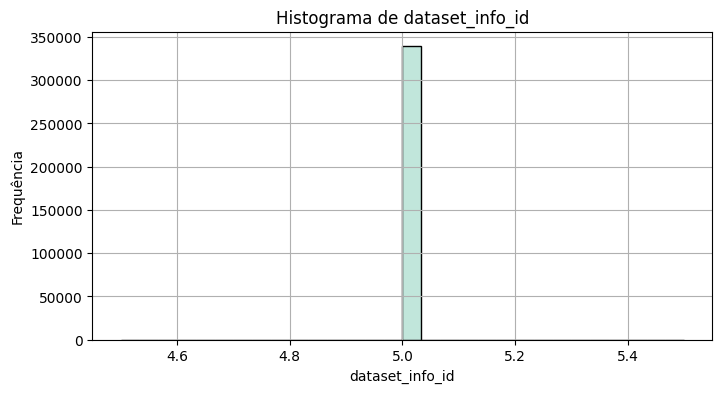


Tabela de Frequência para: score_sentiment


score_sentiment
-1.0000     7
-0.9999    57
-0.9998    18
-0.9997     2
-0.9996     7
           ..
 0.9987     3
 0.9988     1
 0.9989    11
 0.9990     2
 0.9992    11
Name: count, Length: 7807, dtype: int64

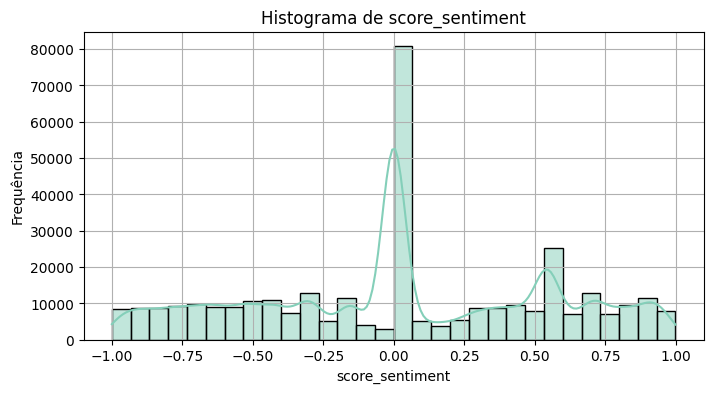


Tabela de Frequência para: score_misinformation


score_misinformation
0.000003    1
0.000025    1
0.000042    1
0.000056    1
0.000067    1
           ..
1.000000    3
1.000000    1
1.000000    6
1.000000    1
1.000000    2
Name: count, Length: 100588, dtype: int64

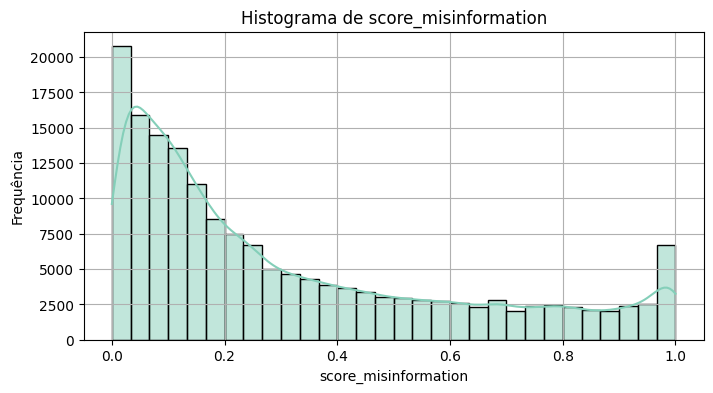


Tabela de Frequência para: id_message


id_message
2          1
3          1
4          1
5          1
6          1
          ..
1516403    1
1516410    1
1516422    1
1516427    1
1516436    1
Name: count, Length: 232563, dtype: int64

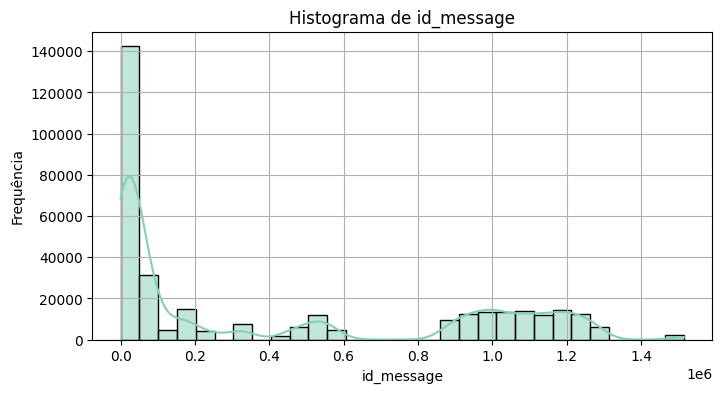


Tabela de Frequência para: qtd_palavras


qtd_palavras
5       5480
6       5286
7       4140
8       3251
9       3810
        ... 
926       24
943        1
993        8
994        7
1261       3
Name: count, Length: 748, dtype: int64

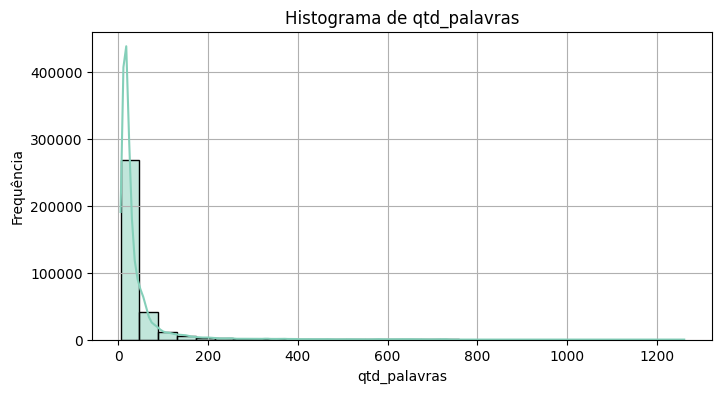

In [23]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    # Tabela de Frequência
    frequencia = serie.value_counts().sort_index()
    print(f"\nTabela de Frequência para: {coluna}")
    display(frequencia)
    
    
    # Seleciona uma cor da paleta BuGn
    bu_gn_color = sns.color_palette("BuGn", as_cmap=False)[2]  # Seleciona um tom intermediário

    # Histograma
    plt.figure(figsize=(8, 4))
    sns.histplot(serie, bins=30, kde=True, color=bu_gn_color)
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

#### 4. **Boxplot**


Tabela de Frequência para: dataset_info_id


dataset_info_id
5    339286
Name: count, dtype: int64

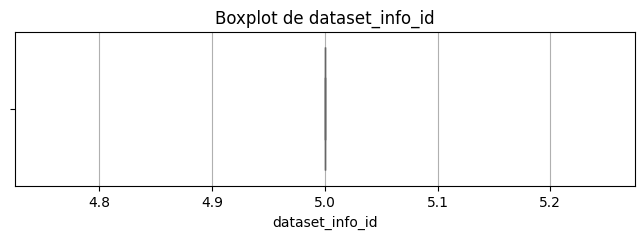


Tabela de Frequência para: score_sentiment


score_sentiment
-1.0000     7
-0.9999    57
-0.9998    18
-0.9997     2
-0.9996     7
           ..
 0.9987     3
 0.9988     1
 0.9989    11
 0.9990     2
 0.9992    11
Name: count, Length: 7807, dtype: int64

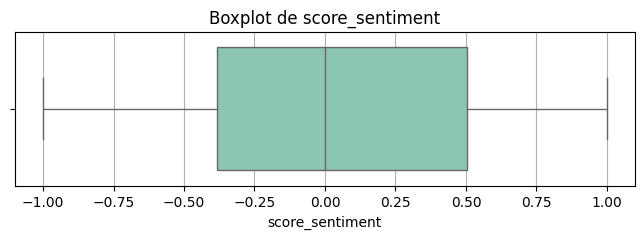


Tabela de Frequência para: score_misinformation


score_misinformation
0.000003    1
0.000025    1
0.000042    1
0.000056    1
0.000067    1
           ..
1.000000    3
1.000000    1
1.000000    6
1.000000    1
1.000000    2
Name: count, Length: 100588, dtype: int64

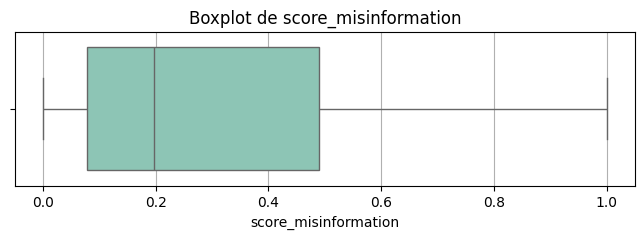


Tabela de Frequência para: id_message


id_message
2          1
3          1
4          1
5          1
6          1
          ..
1516403    1
1516410    1
1516422    1
1516427    1
1516436    1
Name: count, Length: 232563, dtype: int64

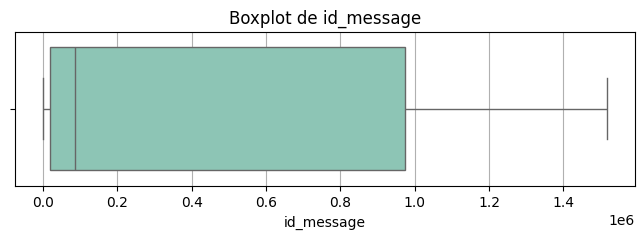


Tabela de Frequência para: qtd_palavras


qtd_palavras
5       5480
6       5286
7       4140
8       3251
9       3810
        ... 
926       24
943        1
993        8
994        7
1261       3
Name: count, Length: 748, dtype: int64

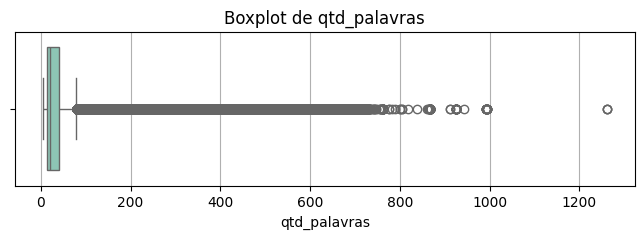

In [26]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    # Tabela de Frequência
    frequencia = serie.value_counts().sort_index()
    print(f"\nTabela de Frequência para: {coluna}")
    display(frequencia)

    bu_gn_color = sns.color_palette("BuGn", as_cmap=False)[2]  # Seleciona um tom intermediário

    # Boxplot
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=serie, color=bu_gn_color)
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)
    plt.grid(True, axis='x')
    plt.show()

#### 5. **QQ-Plot**

# Fontes

- [Matplotlib 3.10.3 documentation](https://matplotlib.org/stable/index.html)
- [Seaborn Documentation](seaborn.histplot)
- [Statistical Data Visualization with Seaborn](https://seaborn.pydata.org/tutorial.html)